In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
x=df.iloc[:,[3,4]]

In [5]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
#I dont have domain knowledge therefore i used for loop in that i have itered K value 

wcss=[]
sil_score={}
for k in range(2,31):
    km=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=1)
    km.fit(x)
    wcss.append(km.inertia_)
    sil_score[k]=silhouette_score(x,km.labels_)

In [8]:
wcss

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30566.45113025186,
 25005.55037243283,
 21996.523372372307,
 19746.911957660894,
 17602.19046838677,
 15926.627039985106,
 14631.802353268315,
 12793.951692914929,
 12002.023047743332,
 11151.50775058275,
 10264.837447764541,
 9490.19002831011,
 8880.551059466847,
 8121.5007317801665,
 7667.180982236156,
 7385.859950013755,
 7018.027058579537,
 6517.28038699806,
 6232.733574758575,
 5756.705148119854,
 5413.182221401787,
 5208.137817737817,
 4989.701612276613,
 4797.261291486293]

## Elbow Method

#### As I increase no of clusters K falls .when K is increasing and Inertia remains constant and we need to find best value of K

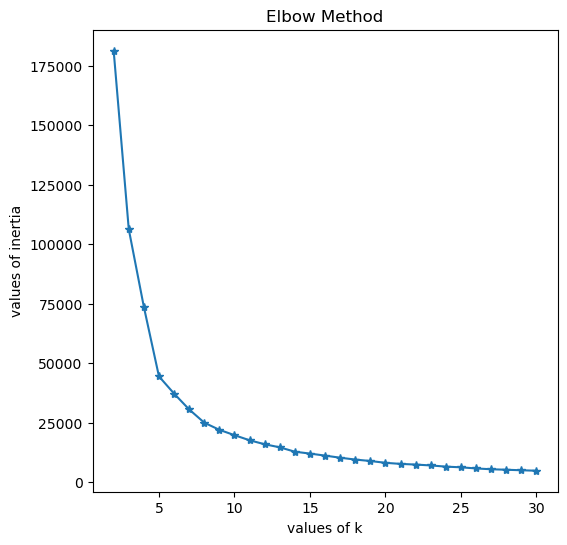

In [9]:
plt.figure(figsize=(6,6))
plt.title("Elbow Method")
plt.xlabel("values of k")
plt.ylabel("values of inertia")
plt.plot(range(2,31),wcss,marker="*")

In [10]:
sil_score

{2: 0.2968969162503008,
 3: 0.46761358158775435,
 4: 0.4931963109249047,
 5: 0.553931997444648,
 6: 0.53976103063432,
 7: 0.5321706886465517,
 8: 0.4551677607101082,
 9: 0.45310062629634446,
 10: 0.4499261454462227,
 11: 0.437841976811071,
 12: 0.4386071394328943,
 13: 0.4524549850289858,
 14: 0.42171806687463326,
 15: 0.41222811817723953,
 16: 0.429087021596755,
 17: 0.40315775571413903,
 18: 0.4228189724059163,
 19: 0.41577217720188464,
 20: 0.4316915189885506,
 21: 0.42120160009519103,
 22: 0.41371955293515034,
 23: 0.40909705857729195,
 24: 0.40917196006495404,
 25: 0.414003801095441,
 26: 0.42235569719534993,
 27: 0.42754942193311535,
 28: 0.41437991388555045,
 29: 0.41249932229964287,
 30: 0.4235681955512392}

In [11]:
km1=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=1)
c_labels=km1.fit_predict(x)
    

In [12]:
c_labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [13]:
df['Target']=c_labels

In [14]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


In [15]:
km1.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [16]:
centroid_df=pd.DataFrame(km1.cluster_centers_,columns=['X','Y'])
centroid_df

,X,Y
0,25.727273,79.363636
1,88.200000,17.114286
2,55.296296,49.518519
3,86.538462,82.128205
4,26.304348,20.913043


In [17]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


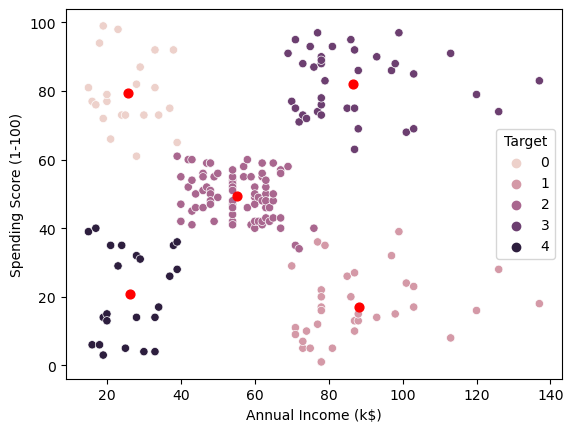

In [18]:
sns.scatterplot(data=df,x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Target'])
plt.scatter(centroid_df['X'],centroid_df['Y'],s=40,color='red')
plt.show()